# TEST A PERCEPTUAL PHENOMENON

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from math import *
%matplotlib inline


In [2]:
path = os.getcwd()

In [3]:
df = pd.read_csv(path+"\stroopdata.csv", sep=",")

In [4]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


### 1. What is our independent variable? What is our dependent variable?
> Independent variables are Word Condition( congruent and incongruent) and dependent varibale is the Response Time. 

### 2. What is an appropriate set of hypotheses for this task? Specify the null and alternative hypotheses based on what you think the researchers might be interested in. Justify your choices.
>$H_0 $ ( μi - μc = 0 ) Null hypothesis is that there is no difference in the response time to name congruent and incongruent words <br>
$H_1$ ( μi - μc ≠ 0 ) Alternate hypothesis is that there is difference in the response time to name congruent and incongruent words<br>
>
μi population mean from where incongruent word sample derived<br>
μc population mean from where congruent word sample was derived<br>

>The Dependent Samples t-Test is the appropriate statistical test as the same subjects are assigned two different conditions. The different conditions are dependent because, in theory, by doing the first test you have some practice doing it and you might have an unfair advantage due to this learning effect in doing the similar type of test second. In addition, we don't have any population parameters provided (so a z-test would not be appropriate here)

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.


In [5]:
c = df['Congruent']; i = df['Incongruent']

In [6]:
print(" The mean of congruent and incongruent time are {} and {}".format(c.mean(), i.mean()))

 The mean of congruent and incongruent time are 14.051125000000004 and 22.01591666666667


In [7]:
print(" The SD of congruent and incongruent time are {} and {}".format(c.std(), i.std()))

 The SD of congruent and incongruent time are 3.559357957645195 and 4.797057122469138


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

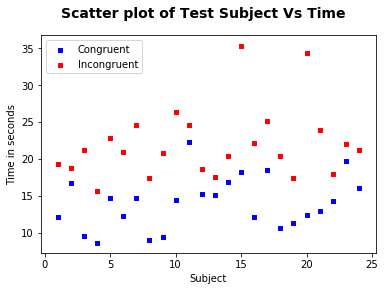

In [8]:
df["sample"] = df.index+1

x   = df["sample"]
y_c = df["Congruent"]
y_i = df["Incongruent"]

fig = plt.figure()
fig.suptitle("Scatter plot of Test Subject Vs Time", fontsize = 14, fontweight = 'bold')
ax = fig.add_subplot(111)
ax.set_xlabel("Subject")
ax.set_ylabel("Time in seconds")

plt.scatter(x, y_c, s=10, c='b', marker='s', label = "Congruent")
plt.scatter(x, y_i, s=10, c='r', marker='s', label = "Incongruent")

plt.legend(loc="upper left")
plt.show()

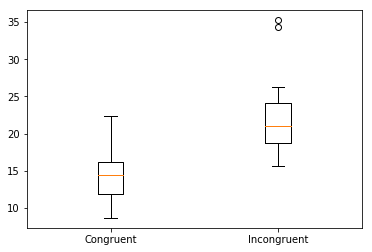

In [9]:
box_plot = plt.figure()
ax       = box_plot.add_subplot(111)
bp       = ax.boxplot([y_c, y_i])
labels   = ['Congruent', 'Incongruent']

ax.set_xticklabels(labels)
plt.show()

From the plot it is clear that average incongruent response time is higher the congruent time for the sample

### 5. Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? Hint: Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

>Confidence Level = 95% <br>
t-critical value (2-sided test) -> from [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)<br>
df = n - 1 = 23<br>
tcrit = +- 2.069<br>

In [26]:
#number of subjects 
n = len(df)


#point estimate 
PE = i.mean() - c.mean()
round(PE,2)

#s - sample standard deviation of differences
#1. D = sample difference
df['D'] = df['Incongruent'] - df['Congruent']

#2. DFM = difference from the mean
#SQD = squared differences from the mean
DFM = df['D'] - df['D'].mean()
df['SQD'] = DFM*DFM

#3. SSD = sum of squared differences
SSD = df['SQD'].sum()

#4. v = variance = SSD/(n-1)
v = SSD/(n-1)

#5. s = sqrt(v)
s = sqrt(v)
round(s,2)

#t-statistic
#t = PE/(s/√n)
#PE = (μi - μc)
t = PE/(s/(sqrt(n)))
print("T-statistic value is  {}".format(round(t,4)))

T-statistic value is  8.0207


#### Conclusion
>From above it is clear that t-statistic(8.0207) > t-critical(2.069). We reject the NULL hypothesis as there is significant differance in time consumed by the test subjects to answer congruent and incongruent sample questions. 

>From personal experience of taking the test there was a significant differance in time consumed to answer the rwo set of questions.

>The results match up to my expectations